## Dependencias

In [1]:
from functools import reduce
from auxiliares import categorizar,woe,iv

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

sns.set()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Análisis exploratorio de los datos de entrenamiento

### Lectura de los datos 

In [2]:
train=pd.read_csv('~/train.csv')
train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_between_issued_earliest_cr
0,9217698,6000,6000,6000.0,36,13.67,204.11,B,B5,3 years,RENT,36000.0,Not Verified,n,credit_card,CT,15.20,0.0,1.0,NaN,NaN,12.0,0.0,7894,65.8,13.0,w,0.0,NaN,0.0,0.0,12871.0,12000.0,0,51.0
1,5795876,27075,27075,27075.0,60,15.80,655.54,C,C3,NaN,MORTGAGE,60780.0,Verified,n,debt_consolidation,VA,18.34,0.0,0.0,NaN,NaN,9.0,0.0,21686,58.1,20.0,f,0.0,NaN,0.0,1115.0,111385.0,37300.0,0,354.0
2,480240,14000,14000,14000.0,36,13.11,472.43,C,C2,1 year,RENT,73000.0,Not Verified,n,credit_card,NJ,21.34,0.0,0.0,NaN,NaN,16.0,0.0,17457,71.3,33.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,114.0
3,12175000,15000,15000,15000.0,60,15.31,359.30,C,C4,4 years,RENT,50000.0,Verified,n,debt_consolidation,AL,32.48,2.0,1.0,11.0,NaN,26.0,0.0,16950,54.2,42.0,f,0.0,NaN,0.0,0.0,51457.0,31300.0,0,120.0
4,1457987,8700,8700,8700.0,36,8.90,276.26,A,A5,8 years,MORTGAGE,28500.0,Not Verified,n,debt_consolidation,MI,14.03,0.0,0.0,NaN,NaN,7.0,0.0,3819,42.4,15.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,221.0


In [3]:
train.shape

(326399, 35)

### tipos de datos

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326399 entries, 0 to 326398
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               326399 non-null  int64  
 1   loan_amnt                        326399 non-null  int64  
 2   funded_amnt                      326399 non-null  int64  
 3   funded_amnt_inv                  326399 non-null  float64
 4   term                             326399 non-null  int64  
 5   int_rate                         326399 non-null  float64
 6   installment                      326399 non-null  float64
 7   grade                            326399 non-null  object 
 8   sub_grade                        326399 non-null  object 
 9   emp_length                       311808 non-null  object 
 10  home_ownership                   326399 non-null  object 
 11  annual_inc                       326396 non-null  float64
 12  ve

### Definición de las variables

In [5]:
varc=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 
       'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_between_issued_earliest_cr','collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'delinq_2yrs', 'inq_last_6mths', 'pub_rec']

vard=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', ]

um = ['id']

target=['target']

In [6]:
len(varc),len(vard)

(23, 9)

### Análisis de las variables continuas

#### Valores faltantes

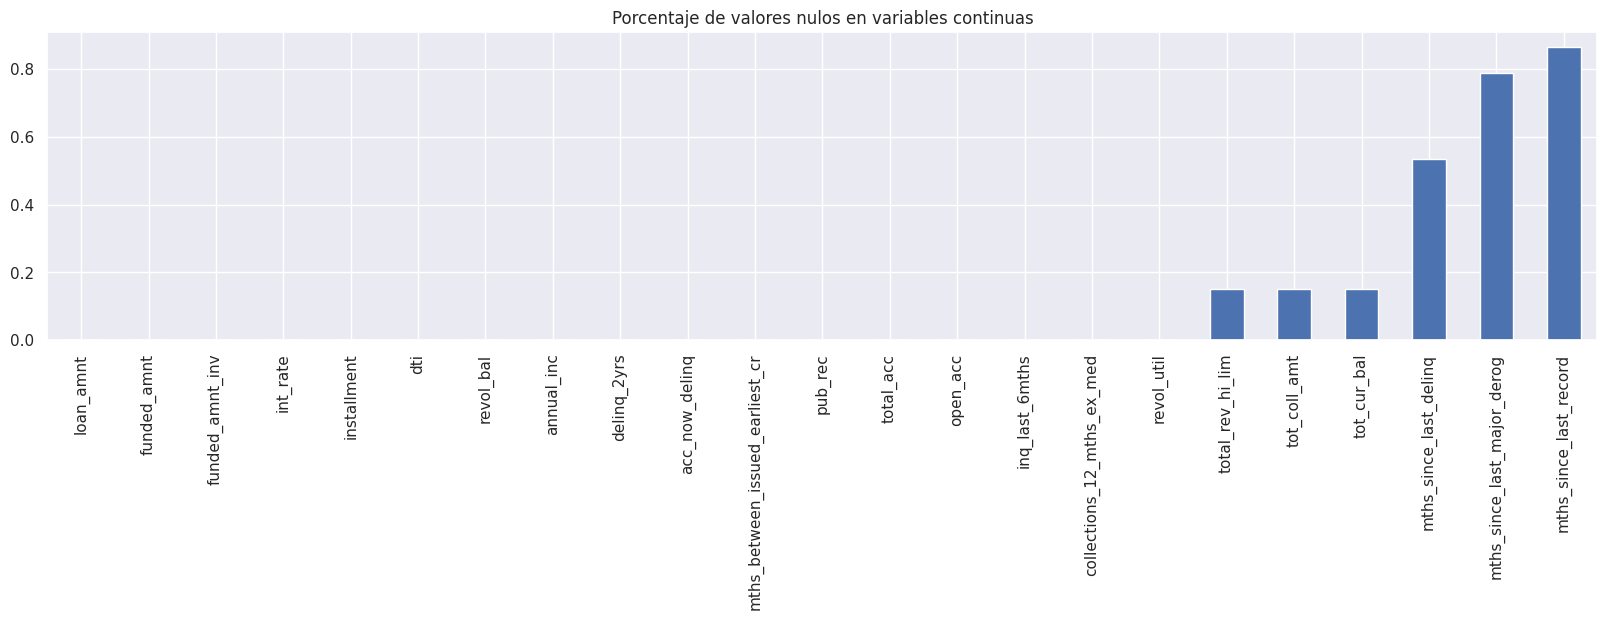

In [7]:
train[varc].isna().mean().sort_values().plot(kind='bar',figsize=(20,4),title='Porcentaje de valores nulos en variables continuas')
plt.show()

In [8]:
im = SimpleImputer(strategy='median')
im.fit(train[varc])

SimpleImputer(strategy='median')

In [9]:
train_i=pd.DataFrame(im.transform(train[varc]),columns=varc) #imputamos valores faltantes con la mediana
train_i.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec
0,6000.0,6000.0,6000.0,13.67,204.11,36000.0,15.20,12.0,7894.0,65.8,13.0,12871.0,12000.0,31.0,76.0,42.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0
1,27075.0,27075.0,27075.0,15.80,655.54,60780.0,18.34,9.0,21686.0,58.1,20.0,111385.0,37300.0,31.0,76.0,42.0,354.0,0.0,0.0,1115.0,0.0,0.0,0.0
2,14000.0,14000.0,14000.0,13.11,472.43,73000.0,21.34,16.0,17457.0,71.3,33.0,81398.5,22900.0,31.0,76.0,42.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15000.0,15000.0,15000.0,15.31,359.30,50000.0,32.48,26.0,16950.0,54.2,42.0,51457.0,31300.0,11.0,76.0,42.0,120.0,0.0,0.0,0.0,2.0,1.0,0.0
4,8700.0,8700.0,8700.0,8.90,276.26,28500.0,14.03,7.0,3819.0,42.4,15.0,81398.5,22900.0,31.0,76.0,42.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#calculamos estadistico ks
ks=pd.DataFrame(map(lambda x: (x,round(stats.ks_2samp(train_i[x],train[x].dropna()).statistic,3)),varc),columns=['variable','ks'])
ks.sort_values(by='ks',ascending=False)

,variable,ks
14,mths_since_last_record,0.430
15,mths_since_last_major_derog,0.392
13,mths_since_last_delinq,0.265
11,tot_cur_bal,0.075
12,total_rev_hi_lim,0.075
19,tot_coll_amt,0.019
21,inq_last_6mths,0.000
20,delinq_2yrs,0.000
18,acc_now_delinq,0.000
17,collections_12_mths_ex_med,0.000


In [11]:
# variables con ks menor a .1, no las afecta la imputacion
varc=ks['variable'][ks['ks']<.1].tolist()

# variables con ks mayor a .1, las vamos a discretizar por separado
vard2=ks['variable'][ks['ks']>.1].tolist()

In [12]:
train_i=train_i[varc]

#### Discretización de variables continuas

In [13]:
kb_list=[]
mapa_disc={}
for bin in range(4,11):    
    bins=bin
    kb=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')
    aux=pd.DataFrame(kb.fit_transform(train_i[varc]),columns=[f'disc_{var}_{bins}' for var in varc])
    mapa={var:{k:v for k,v in enumerate(vals)} for var,vals in \
          zip(aux.columns,map(lambda x:[*map(lambda x:str(x).replace(')',']'),zip(np.round(x,2),np.round(x[1:],2)))],kb.bin_edges_))}
    aux=aux.replace(mapa)
    train_i=pd.concat([train_i,aux],axis=1)
    kb_list.append(kb)
    mapa_disc.update(mapa)

In [14]:
train_i.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10
0,6000.0,6000.0,6000.0,13.67,204.11,36000.0,15.20,12.0,7894.0,65.8,13.0,12871.0,12000.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0,"(500.0, 8000.0]","(500.0, 8000.0]","(0.0, 8000.0]","(13.66, 16.49]","(15.67, 256.88]","(1896.0, 45000.0]","(11.35, 16.87]","(10.0, 14.0]","(6413.0, 11769.0]","(57.6, 74.7]","(1.0, 17.0]","(0.0, 33597.0]","(0.0, 15000.0]","(6.0, 133.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 28.0]","(0.0, 40.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(12.49, 14.49]","(15.67, 226.4]","(1896.0, 41600.0]","(14.71, 19.09]","(12.0, 15.0]","(5447.0, 9457.0]","(64.3, 78.5]","(1.0, 15.0]","(0.0, 27130.0]","(0.0, 13030.2]","(6.0, 123.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 2.0]","(0.0, 40.0]","(6000.0, 10000.0]","(6000.0, 10000.0]","(6000.0, 9900.0]","(13.66, 15.59]","(203.42, 300.61]","(1896.0, 40000.0]",

### Análisis de las variables discretas

#### Valores faltantes

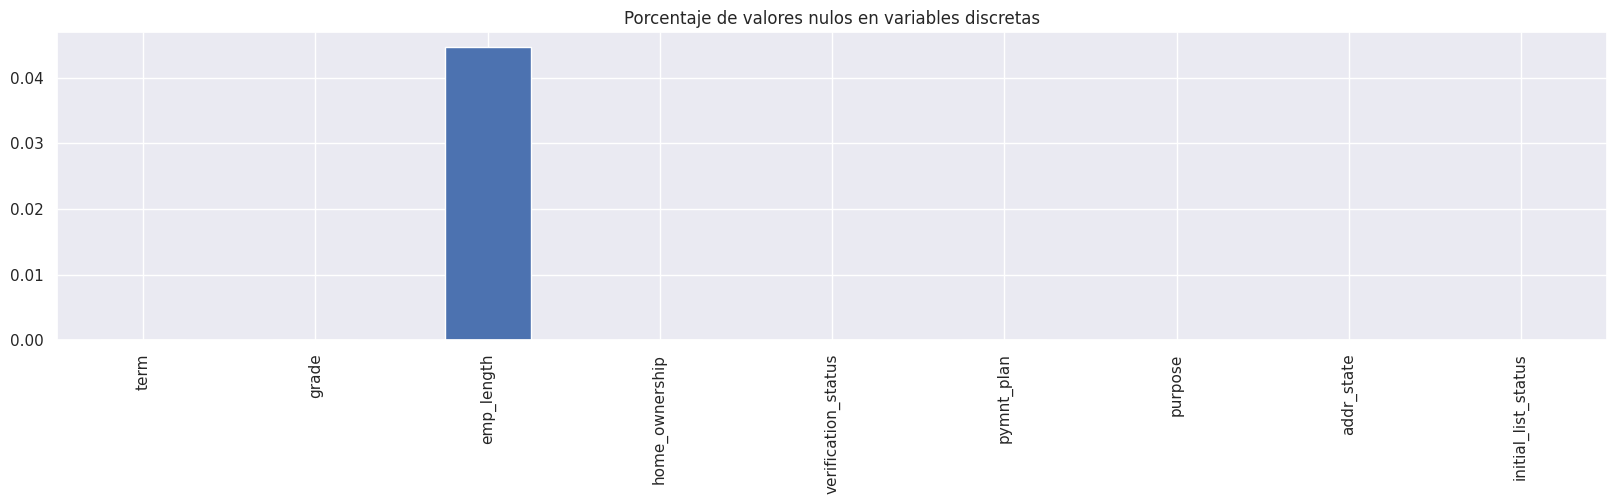

In [15]:
train[vard].isna().mean().plot(kind='bar',figsize=(20,4),title='Porcentaje de valores nulos en variables discretas')
plt.show()

In [16]:
train[vard]=train[vard].fillna('missing')

#### Tablas de frecuencia

In [17]:
for var in vard:
    print(var.center(50,'-'),'\n')    
    print(train[var].value_counts(normalize=True))
    print('\n')

-----------------------term----------------------- 

36    0.724288
60    0.275712
Name: term, dtype: float64


----------------------grade----------------------- 

B    0.293487
C    0.269299
D    0.165221
A    0.160387
E    0.076345
F    0.028248
G    0.007013
Name: grade, dtype: float64


--------------------emp_length-------------------- 

10+ years    0.322032
2 years      0.088661
3 years      0.078404
< 1 year     0.077938
5 years      0.066069
1 year       0.063144
4 years      0.060408
7 years      0.056216
6 years      0.055867
8 years      0.047947
missing      0.044703
9 years      0.038609
Name: emp_length, dtype: float64


------------------home_ownership------------------ 

MORTGAGE    0.505832
RENT        0.404229
OWN         0.089467
OTHER       0.000472
Name: home_ownership, dtype: float64


---------------verification_status---------------- 

Verified           0.359851
Source Verified    0.321925
Not Verified       0.318224
Name: verification_status, dtype: float64


#### Colapsar categorías

In [18]:
train['grade']=train['grade'].replace(['F','G'],'<E')
train['emp_length']=train['emp_length'].replace(['1 year','< 1 year'],'<2 years').replace(['2 years','3 years','4 years'],'2-4 years')\
    .replace(['5 years','6 years','7 years','8 years','9 years'],'5-9 years')
train['purpose']=train['purpose'].replace(['home_improvement','house'],'home/house')
train['purpose']=train['purpose'].replace(['major_purchase', 'small_business', 'car', 'medical', 'moving', 
                                            'vacation', 'wedding', 'educational', 'renewable_energy'],'other')

### Análisis de variables discretas con muchas categorías

In [19]:
train[vard2].describe()

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
count,151441.000000,43836.000000,69349.000000
mean,34.117155,74.253148,42.828116
std,21.783725,30.432804,21.611332
min,0.000000,0.000000,0.000000
25%,16.000000,53.000000,26.000000
50%,31.000000,76.000000,42.000000
75%,49.000000,102.000000,59.000000
max,188.000000,129.000000,188.000000


In [20]:
train['disc_mths_since_last_delinq']=pd.cut(train['mths_since_last_delinq'],np.percentile(train['mths_since_last_delinq'].dropna(),[0,25,50,75,100]))
train['disc_mths_since_last_record']=pd.cut(train['mths_since_last_record'],np.percentile(train['mths_since_last_record'].dropna(),[0,25,50,75,100]))
train['disc_mths_since_last_major_derog']=pd.cut(train['mths_since_last_major_derog'],np.percentile(train['mths_since_last_major_derog'].dropna(),[0,25,50,75,100]))

In [21]:
train[[f'disc_{var}' for var in vard2]]=train[[f'disc_{var}' for var in vard2]].astype(str).replace('nan','missing')

#### Reajustar el imputer

In [22]:
im = SimpleImputer(strategy='median')
im.fit(train[varc])

SimpleImputer(strategy='median')

### Datos de entrenamiento discretizados

In [23]:
train_disc=pd.concat([train[um[0]],train_i,train[vard],train[[f'disc_{var}' for var in vard2]],train[target[0]]],axis=1)
train_disc.shape

(326399, 174)

In [24]:
train_disc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target
0,9217698,6000.0,6000.0,6000.0,13.67,204.11,36000.0,15.20,12.0,7894.0,65.8,13.0,12871.0,12000.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0,"(500.0, 8000.0]","(500.0, 8000.0]","(0.0, 8000.0]","(13.66, 16.49]","(15.67, 256.88]","(1896.0, 45000.0]","(11.35, 16.87]","(10.0, 14.0]","(6413.0, 11769.0]","(57.6, 74.7]","(1.0, 17.0]","(0.0, 33597.0]","(0.0, 15000.0]","(6.0, 133.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 28.0]","(0.0, 40.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(12.49, 14.49]","(15.67, 226.4]","(1896.0, 41600.0]","(14.71, 19.09]","(12.0, 15.0]","(5447.0, 9457.0]","(64.3, 78.5]","(1.0, 15.0]","(0.0, 27130.0]","(0.0, 13030.2]","(6

### Transformación WoE de los datos de entrenamiento

In [25]:
vars_train=vard+[v for v in train_disc.columns if 'disc' in v]

In [26]:
mapa_woe={var:woe(train_disc,var,'target')['woe'].to_dict() for var in vars_train}

In [27]:
for var in vars_train:
    train_disc[f'woe_{var}']=train_disc[var].map(mapa_woe[var])

In [28]:
train_disc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

## Transformación de los datos de prueba

### Lectura de los datos

In [29]:
test=pd.read_csv('~/test.csv')
test.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_between_issued_earliest_cr
0,3699171,14600,14600,14600.000000,36,21.00,550.06,E,E2,6 years,RENT,38000.00,Verified,n,other,CA,21.76,1.0,1.0,7.0,NaN,14.0,0.0,12191,67.4,21.0,w,0.0,7.0,0.0,0.0,25327.0,18100.0,1,110.0
1,7345185,15050,15050,15050.000000,36,19.52,555.64,D,D4,4 years,OWN,72000.00,Not Verified,n,home_improvement,CA,16.13,0.0,2.0,NaN,NaN,13.0,0.0,7053,40.5,20.0,f,0.0,NaN,0.0,0.0,44411.0,17400.0,0,146.0
2,9234804,15000,15000,15000.000000,60,14.30,351.37,C,C1,10+ years,MORTGAGE,50000.00,Source Verified,n,debt_consolidation,KY,18.36,0.0,0.0,NaN,NaN,8.0,0.0,8177,43.5,29.0,f,0.0,NaN,0.0,0.0,116762.0,18800.0,0,190.0
3,4525748,31825,31825,31825.000000,60,19.72,838.22,D,D5,3 years,RENT,71000.00,Verified,n,credit_card,PA,15.46,0.0,0.0,NaN,NaN,10.0,0.0,27409,79.9,12.0,w,0.0,NaN,0.0,0.0,35128.0,34300.0,1,111.0
4,442337,5000,5000,4988.236742,36,14.26,171.53,C,C5,9 years,MORTGAGE,55640.62,Not Verified,n,debt_consolidation,MD,8.17,0.0,1.0,NaN,NaN,9.0,0.0,9685,43.2,11.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,143.0


### Discretización de variables continuas

In [30]:
# imputacion de valores faltantes
test_i=pd.DataFrame(im.transform(test[varc]),columns=varc)

In [31]:
# discretizacion de variables continuas
test_i=pd.concat([test_i,reduce(lambda x,y:pd.concat([x,y],axis=1)\
                                ,map(lambda x:pd.DataFrame(x.transform(test_i),columns=[f'disc_{var}_{x.n_bins}' for var in varc]).replace(mapa_disc),kb_list))],axis=1)
test_i.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10
0,14600.0,14600.0,14600.000000,21.00,550.06,38000.00,21.76,14.0,12191.0,67.4,21.0,25327.0,18100.0,110.0,0.0,0.0,0.0,1.0,1.0,0.0,"(12000.0, 20000.0]","(12000.0, 20000.0]","(12000.0, 19950.0]","(16.49, 26.06]","(379.76, 565.62]","(1896.0, 45000.0]","(16.87, 22.78]","(14.0, 84.0]","(11769.0, 20324.0]","(57.6, 74.7]","(17.0, 23.0]","(0.0, 33597.0]","(15000.0, 22900.0]","(6.0, 133.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 28.0]","(0.0, 40.0]","(10100.0, 15000.0]","(10075.0, 15000.0]","(10000.0, 15000.0]","(17.57, 26.06]","(449.03, 621.95]","(1896.0, 41600.0]","(19.09, 24.21]","(12.0, 15.0]","(9457.0, 14535.0]","(64.3, 78.5]","(21.0, 26.0]","(0.0, 27130.0]","(13030.2, 21600.0]","(6.0, 123.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 2.0]","(0.0, 40.0]","(12000.0, 16675.0]","(12000.0, 16500.0]","(12000.0, 16425.0]","(18

In [32]:
train_i.shape,test_i.shape

((326399, 160), (139886, 160))

### variables discretas

In [33]:
test[vard]=test[vard].fillna('missing')

In [34]:
test['grade']=test['grade'].replace(['F','G'],'<E')
test['emp_length']=test['emp_length'].replace(['1 year','< 1 year'],'<2 years').replace(['2 years','3 years','4 years'],'2-4 years')\
    .replace(['5 years','6 years','7 years','8 years','9 years'],'5-9 years')
test['purpose']=test['purpose'].replace(['home_improvement','house'],'home/house')
test['purpose']=test['purpose'].replace(['major_purchase', 'small_business', 'car', 'medical', 'moving', 
                                            'vacation', 'wedding', 'educational', 'renewable_energy'],'other')

### variables discretas con muchas categorías

In [35]:
test['disc_mths_since_last_delinq']=pd.cut(test['mths_since_last_delinq'],np.percentile(train['mths_since_last_delinq'].dropna(),[0,25,50,75,100]))
test['disc_mths_since_last_record']=pd.cut(test['mths_since_last_record'],np.percentile(train['mths_since_last_record'].dropna(),[0,25,50,75,100]))
test['disc_mths_since_last_major_derog']=pd.cut(test['mths_since_last_major_derog'],np.percentile(train['mths_since_last_major_derog'].dropna(),[0,25,50,75,100]))

In [36]:
test[[f'disc_{var}' for var in vard2]]=test[[f'disc_{var}' for var in vard2]].astype(str).replace('nan','missing')

### Datos de prueba discretizados

In [37]:
test_disc=pd.concat([test[um[0]],test_i,test[vard],test[[f'disc_{var}' for var in vard2]],test[target[0]]],axis=1)
test_disc.shape

(139886, 174)

In [38]:
test_disc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target
0,3699171,14600.0,14600.0,14600.000000,21.00,550.06,38000.00,21.76,14.0,12191.0,67.4,21.0,25327.0,18100.0,110.0,0.0,0.0,0.0,1.0,1.0,0.0,"(12000.0, 20000.0]","(12000.0, 20000.0]","(12000.0, 19950.0]","(16.49, 26.06]","(379.76, 565.62]","(1896.0, 45000.0]","(16.87, 22.78]","(14.0, 84.0]","(11769.0, 20324.0]","(57.6, 74.7]","(17.0, 23.0]","(0.0, 33597.0]","(15000.0, 22900.0]","(6.0, 133.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 28.0]","(0.0, 40.0]","(10100.0, 15000.0]","(10075.0, 15000.0]","(10000.0, 15000.0]","(17.57, 26.06]","(449.03, 621.95]","(1896.0, 41600.0]","(19.09, 24.21]","(12.0, 15.0]","(9457.0, 14535.0]","(64.3, 78.5]","(21.0, 

### Transformación WoE de los datos de prueba

In [39]:
for var in vars_train:
    test_disc[f'woe_{var}']=test_disc[var].map(mapa_woe[var])

In [40]:
test_disc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

In [41]:
train_disc.shape,test_disc.shape

((326399, 326), (139886, 326))

## Guardar los datos

In [42]:
train_disc.to_csv('~/train_discretizado.csv',index=False)
test_disc.to_csv('~/test_discretizado.csv',index=False)